### Домашнее задание №1, Филимохина Александра

#### 1) Эксперимент для оценки параметров равномерного и экспоненцивального распределений

In [325]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

In [355]:
def Parametrs_test(theta, dist, k_max = 100, n_samples =1000):
    
    def uni_estimation(X, k):
        return((np.mean(X**k))*(k+1))**(1/k)
    def exp_estimation(X, k):
        return(factorial(k) / np.mean(X**k)) ** ( 1 / k)
    def std(X, theta_est):
        return np.sqrt(np.mean((X-theta_est)**2))

    thetas_apr, stds, max_dev,min_dev = [],[], -np.inf, np.inf
    k_moments = np.arange(1, k_max)
    
    if dist is "Uni":
        X_uni = np.random.uniform(0,theta,size = n_samples)
        for k in k_moments:
            thetas_apr.append(uni_estimation(X_uni, k))
            stds.append(std(X_uni, thetas_apr[-1]))
            max_dev = max(abs(thetas_apr[-1] - theta), max_dev)
            min_dev = min(abs(thetas_apr[-1] - theta), min_dev)
        
    if dist is "Exp":
        X_exp = np.random.exponential(theta, size=n_samples)
        for k in k_moments:
            thetas_apr.append(exp_estimation(X_exp, k))
            stds.append(std(X_exp, thetas_apr[-1]))
            max_dev = max(abs(thetas_apr[-1] - theta), max_dev)
            min_dev = min(abs(thetas_apr[-1] - theta), min_dev)
            
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))
    ax = axs[0]
    ax.plot(k_moments,thetas_apr,'o-', label='$\\hat{\\theta}$')
    ax.axhline(theta, label='$\\theta$', ls = '--', c= 'g')
    ax.set_title(f'Зависимост параметра $\\theta$ от момента')
    ax.set_xlabel("K-ый момент")
    ax.set_ylabel("$\\theta$")
    ax.legend()
    
    ax = axs[1]
    ax.plot(k_moments,stds,'o-', label='$\\hat{\\theta}$')
    #plt.axhline(theta, label='$\\theta$', ls = '--', c= 'g')
    ax.set_title(f'Зависимость СКО оценки параметра $\\theta$ от момента')
    ax.set_xlabel("K-ый момент")
    
    fig.suptitle(f'Равномерное распределение с параметром $\\theta$ = {theta}')
    plt.show()
    print(f"\tВыборка размера: {n_samples}" )
    print("\t-----------------------------------------------------------" )
    print(f"\tМаксимальное абсолютное отклонение оценки от параметра: {round(max_dev,5)}" )
    print(f"\tМинимально  абсолютное отклонение оценки от параметра: {round(min_dev,5)}" )
    print("\t-----------------------------------------------------------" )
    print(f"\tМаксимально СКО: {round(max(stds), 5)}" )
    print(f"\tМинимальное СКО: {round(min(stds), 5)}" )
    

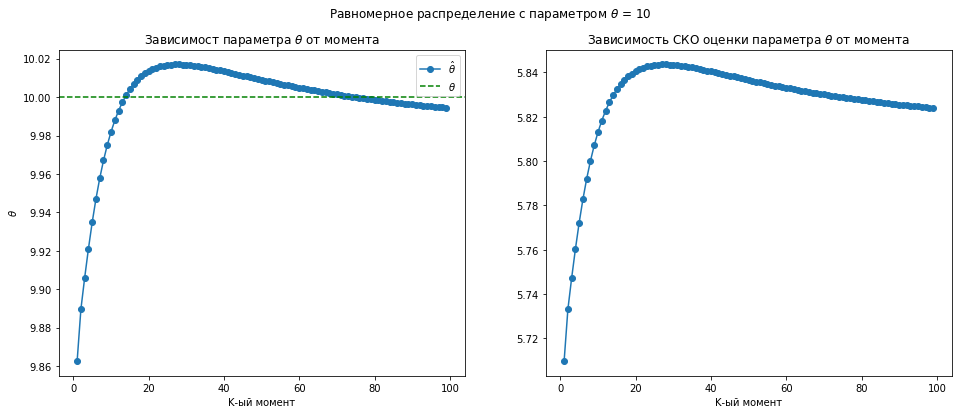

	Выборка размера: 1000
	-----------------------------------------------------------
	Максимальное абсолютное отклонение оценки от параметра: 0.1373
	Минимально  абсолютное отклонение оценки от параметра: 6e-05
	-----------------------------------------------------------
	Максимально СКО: 5.84361
	Минимальное СКО: 5.70982


In [359]:
Parametrs_test(10, k_max =100, dist = "Uni")

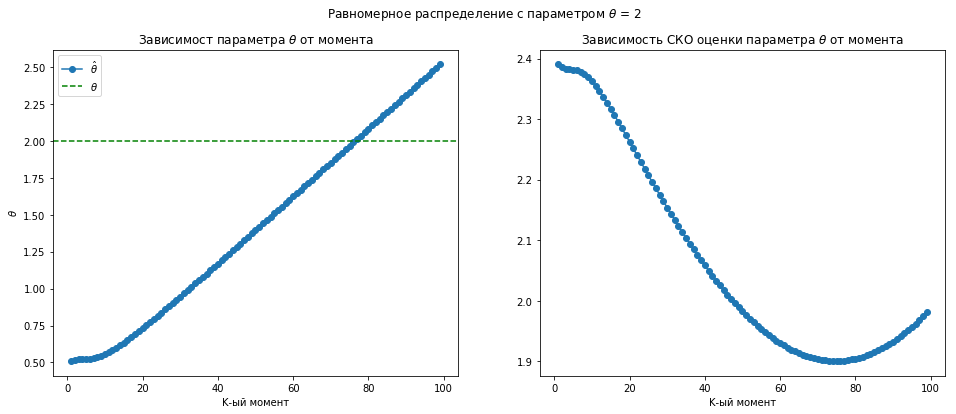

	Выборка размера: 1000
	-----------------------------------------------------------
	Максимальное абсолютное отклонение оценки от параметра: 1.48982
	Минимально  абсолютное отклонение оценки от параметра: 0.0099
	-----------------------------------------------------------
	Максимально СКО: 2.39045
	Минимальное СКО: 1.90052


In [360]:
Parametrs_test(2, k_max =100, dist = "Exp")

#### Вывод: 
По графикам видим, что оценка, полученная для параметра равномерного распрделения достаточно хорошо сходится к точному значению параметра тета. Однако, для показательного распредления она она значительно отклоняется.

#### 2) $p(x,\theta) = \theta x^{\theta-1}, x \in [0,1]$
* $ L = \prod_{i=1}^np(X_i,\theta)=\prod_{i=1}^n\theta X_i^{\theta-1}=\theta^n\prod_{i=1}^nX_i^{\theta-1}$
* $ Ln(L)=Ln(\theta^n\prod_{i=1}^nX_i^{\theta-1})=nLn(\theta)+(\theta-1)\sum_{i=1}^nLn(X_i)$
* $\frac{\partial Ln(L)}{\partial \theta}=\frac{n}{\theta}+\sum_{i=1}^nLn(X_i)$
* $\frac{\partial Ln(L)}{\partial \theta}=0 \rightarrow \hat{\theta} = -\frac{1}{\overline{Ln(X)}}$ 

#### 3) $p(x,\theta) = \frac{2x}{\theta^2}, x \in [0,\theta]$
* $\begin{equation*}
 L(\theta) = 
 \begin{cases}
   (\frac{2}{\theta^2})^n\prod_{i=1}^n X_i &\text{$X_{(n)} \leq \theta$}\\
   0 &\text{$X_{(n)} > \theta$}
 \end{cases}
\end{equation*}$

* $ (\frac{2}{\theta^2})^n\prod_{i=1}^n X_i$-убывающая функция от $\theta$, поэтому ее макисмум достигается на левом конце интервала, значит:  
* $\hat{\theta}= X_{(n)}$ 

#### 4) $ p(x,\theta) = \frac{e^{|x|}}{2(1-e^{-\theta})}, |x| \leq \theta $

* $\begin{equation*}
 L(\theta) = 
 \begin{cases}
   (\frac{1}{2(1-e^{-\theta})})^n \prod_{i=1}^n |X_i| &\text{$max{|X_i|} \leq \theta$}\\
   0 &\text{$max{|X_i|} > \theta$}
 \end{cases}
\end{equation*}$

* $(\frac{1}{2(1-e^{-\theta})})^n \prod_{i=1}^n |X_i|$-убывающая функция, поэтому ее макисмум достигается на левом конце интервала, значит:  
* $\hat{\theta} = max{|X_i|}$ 

#### 5) Равномерное распределение с параметром $\theta$ на отрезке $[0, \theta]$

$\begin{equation*}
L(\theta) = 
 \begin{cases}
   \theta^{-n} &\text{$X_{(n)} \leq \theta$}\\
   0 &\text{$X_{(n)} > \theta$}
 \end{cases}
\end{equation*}$

* Максимум функции правдоподобия достигается при $\theta = X_{(n)}$. Значит $\hat{\theta}= X_{(n)}$
* Плотность распределения максимума по выборке имеет вид: $f(x) = \frac{nx^{n-1}}{\theta^n}$.
* Дисперсия $D(\hat{\theta}) = E(\theta^2)-(E(\theta))^2=\int_{0}^{\theta}x^2\frac{nx^{n-1}}{\theta^n}dx-(\int_{0}^{\theta}x\frac{nx^{n-1}}{\theta^n})^2dx = \frac{\theta^2n}{(n+2)(n+1)^2}$
* СКО: $\sigma = \sqrt(\frac{\theta^2n}{(n+2)(n+1)^2})$
* Информация Фишера: $I(\theta) = E(\frac{\partial L(\theta, X)}{\partial \theta})^2 = E(-\frac{n}{\theta})^2 =\frac{n^2}{\theta^2} $
* $E \hat{\theta} = \frac{n}{(n+1)}\theta = \theta - \frac{\theta}{(n+1)}$
* $b(\theta) = -\frac{\theta}{(n+1)}, b'(\theta) = -\frac{1}{(n+1)}$
*  Неравенство Рао-Крамера:
$E(\hat{\theta}-\theta)^2 \geq \frac{(1+b'(\theta))^2}{I(\theta)}+b^2(\theta)$
* Левая часть: $E\hat{\theta}^2-2E\hat{\theta}\theta+ E\theta^2=-\frac{(n^2+2n-1)\theta^2}{(n+1)(n+2)}$
* Правая часть: $\frac{2\theta^2}{(n+1)^2}$
* Не выполняется: $-\frac{(n^2+2n-1)\theta^2}{(n+1)(n+2)} \geq \frac{2\theta^2}{(n+1)^2}$
* Ведь для выполнения неравенства Рао-Крамера должно выполняться: $\int f'_{\theta}dx = (\int f dx)'$, что не верно для нашей $f$.